[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/6_ex_model_assessment.ipynb) 

# Exercises for Model Assessment 

This notebook is based on the [Model Assessment Notebook](https://). 
This notebook will guide you through related tasks to strengthen your understanding of these concepts & Python programming. Completing this exercise will bring you be yet another step closer to becoming a true data scientist!

Before we start, we will undergo the following steps:
- import standard libraries and set plotting parameters
- import data and define target variable and features
- splitting the data (if you are not familiar with this concept please return to the tutorial)
- train a logit and tree model

At this point, these tasks have become standard practice for us, so we simply provide the codes.

In [3]:
%reset

# Importing standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# Set parameters for plotting
%matplotlib inline  
plt.rcParams["figure.figsize"] = (12,6)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
# Import data
data_url = 'https://raw.githubusercontent.com/Humboldt-WI/bads/master/data/hmeq_modeling.csv' 
df = pd.read_csv(data_url, index_col="index")

# Split data into target and features
X = df.drop(['BAD'], axis=1) 
y = df['BAD']

# Zero-one encoding of the target
df['BAD'] = df['BAD'].astype(int) 

In [5]:
from sklearn.model_selection import train_test_split

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=888)

In [6]:
# Estimate a logit model
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(penalty='none', fit_intercept=True)
logit.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [7]:
# Estimate a CART tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

## Tasks 

In case you might have forgotten some general model assessment procedures, we will start with some simple tasks to get you back into the topic! 

1. Create distinct class predictions for the tree and logit model. Save the results for task 2.

In [10]:
logit_pre = logit.predict(X_test)
tree_pre = tree.predict(X_test)

In [26]:
#from sklearn import metrics  # Important lib where we find various performance measures
#logit_cmat = metrics.confusion_matrix(y_test, logit_pre) 

print(logit_cmat)
#logit_cmat[0][1]
print(logit_cmat[0][0]+logit_cmat[1][1]+logit_cmat[0][1]+logit_cmat[1][0])
print(np.sum(logit_cmat))
print(logit_cmat[0][0])
print(logit_cmat[0,0])
print((logit_cmat[0,0]+logit_cmat[1,1]) / (np.sum(logit_cmat)))
print((logit_cmat[0,0] + logit_cmat[1,1])/(logit_cmat[0][0]+logit_cmat[1][1]+logit_cmat[0][1]+logit_cmat[1][0]))

[[1388   43]
 [ 268   89]]
1788
1788
1388
1388
0.8260626398210291
0.8260626398210291


2. Create the corresponding confusion matrix and manually compute the accuracy, precision and recall.

In [27]:
from sklearn import metrics  # Important lib where we find various performance measures

logit_cmat = metrics.confusion_matrix(y_test, logit_pre) 
print(logit_cmat)
print("")
tree_cmat = metrics.confusion_matrix(y_test, tree_pre) 
print(tree_cmat)
print("")

# Accuracy
logit_acc = (logit_cmat[0][0]+logit_cmat[1][1]) / (np.sum(logit_cmat))
print("Manually calculated accuracy of logit: {:.4}".format(logit_acc))
tree_acc = (tree_cmat[0][0]+tree_cmat[1][1]) / (np.sum(tree_cmat))
print("Manually calculated accuracy of tree: {:.4}".format(tree_acc))
print("")

# Precition
logit_prec = logit_cmat[1][1] / (logit_cmat[1][1]+logit_cmat[0][1])
print("Manually calculated precition of logit: {:.4}".format(logit_prec))
tree_prec = tree_cmat[1][1] / (tree_cmat[1][1]+tree_cmat[0][1])
print("Manually calculated precition of tree: {:.4}".format(tree_prec))
print("")

# Recall
logit_rec = logit_cmat[1][1] / (logit_cmat[1][1]+logit_cmat[1][0])
print("Manually calculated recall of logit: {:.4}".format(logit_rec))
tree_rec = tree_cmat[1][1] / (tree_cmat[1][1]+tree_cmat[1][0])
print("Manually calculated recall of tree: {:.4}".format(tree_rec))


[[1388   43]
 [ 268   89]]

[[1345   86]
 [ 116  241]]

Manually calculated accuracy of logit: 0.8261
Manually calculated accuracy of tree: 0.887

Manually calculated precition of logit: 0.6742
Manually calculated precition of tree: 0.737

Manually calculated recall of logit: 0.2493
Manually calculated recall of tree: 0.6751


Are these results representative for how good the model is? What are the shortfalls of the accuracy measure?

- Not really. Accuracy measures how accurate the model; Precition measures how precise your model is out of those predicted positive, how many of them are actual positive; Recall calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive).  The shortfalls of the accuracy measure is that it was only drawed from a specific data

- Solution: 

- The accuracy measure shows the ratio of correctly predicted observations to all observations, meaning: How many observations did we predict correctly? The accuracy values for both models appear reasonably high, although this is hard to judge by only looking at accuracy figures. Ultimately, you would like to examine the decision costs of a classifier. We will do so much later in the course. Further, **accuracy is an appropriate measure when the share of the classes is roughly even**. This means data where we have a similar distribution between the positive and the negative class. Judging by the difference in predicted 0 and predicted 1 in the confusion matrices, this does not seem to be the case for our data set. Therefore we can look at more metrics.

- Precision describes the ratio of correctly predicted positive observations. **Positive in this case is 'BAD'**. Hence, precision answers the questions how likely it is that a loan which we predict to default will actually default.

- **Recall, also referred to as sensitivity**, describes all the people who defaulted on their loan, and measures how many of these true defaulters we were to predict correctly.

- We see comparably higher values for the tree model and relatively low scores for the logit model. However, this does not mean that the tree model is the better model of both of them. It is not fully representative of how good the model is. When making distinct predictions, we observe these measures for one specific cutoff, most commonly 0.5. The shortfall is that **especially for imbalanced data set, this is not found to always be the best cutoff, which can heavily influence our model performance.**
___

3. Calculate the  class probabilities for both models for class 1. Save the results for task 4.



In [28]:
logit_preb = logit.predict_proba((X_test))[:,1]
tree_preb = tree.predict_proba((X_test))[:,1]

4. Calculate the corresponding AUC values for both predictions and plot the ROC curve.

Model trained: LogisticRegression
The AUC on the test set of this model is: 0.7923

Model trained: DecisionTreeClassifier
The AUC on the test set of this model is: 0.8835



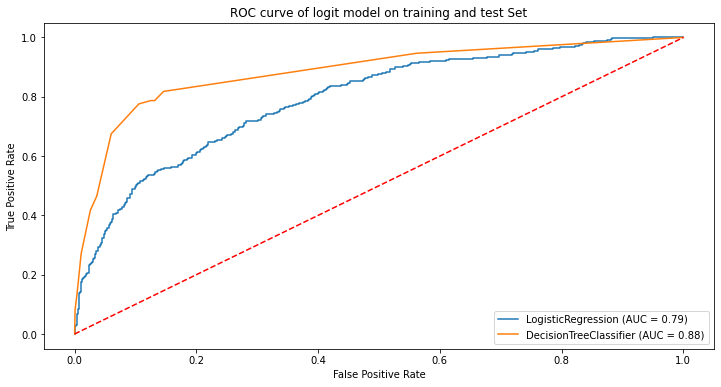

In [30]:
# Create plot
fig, ax = plt.subplots()

# Create list of models for the loop
models = [logit, tree] 

# Loop to train and evaluate a model
for model in models: 
  print('Model trained: {}'.format(type(model).__name__))

  # Fit model using the training set
  model.fit(X_train, y_train) 

  # Make prediction using the test set
  temp = model.predict_proba(X_test)[:,1] 

  # Calcuate AUC score by using the prediction and y_test 
  print('The AUC on the test set of this model is: {:.4f}'.format(metrics.roc_auc_score(y_test, temp))) # use our predictions on the test set and compare them to their actuals, y_test 
  print('')

  # Plot ROC curve
  metrics.plot_roc_curve(model, X_test, y_test, ax=ax) 

# Random benchmark
plt.plot([0, 1], [0, 1], "r--");  

# Plot configuration
plt.title('ROC curve of logit model on training and test Set')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")
plt.show()

How can we interpret this measure? Is it representative?

- **Answer**: The ROC curve and AUC are an extension of the before discussed accuracy, precision and recall measures. We calculate the true positive and false positive rates and plot their trade-off in a graph over all cutoffs. We use probability predictions as the input. It tells you how well a model can distinguish between classes. As the AUC (Area Under the Curve) summarizes the ROC curve into one number, it is a great measure for comparing different models. What AUC value indicates strong performance depends on the setting. Some settings tend to be easier to predict, so comparing models to each other in the same setting will give a good picture of how well the models have performed. However, AUC is always upper bounded by 1, the AUC of a perfect classifier. Likewise, a random classifier, represented by the dashed black line in the above plot, achieves an AUC of 0.5. So any classifier should display AUC much higher than 0.5. In our case, the tree is outperforming the logit model with an AUC of 0.85. The logit model shows an AUC of 0.76, which is still reasonably high.
____
Let's have a closer look at how the cut-offs influence our final results. 

5. Calculate the class probabilities and use these to create distinct class predictions for multiple cut-offs. Vary the cut-off from 0 to 1 in step-sizes of 0.01. Save the accuracy results and corresponding cut-offs. Finally, plot these results, with the cut-offs on the x-axis and the accuracy on the y-axis. Which cut-off gave the highest accuracy?

In [96]:

def cutoff_plot(X, y, model):
    cutoffs = []
    accs = []
    temp0 = model.predict_proba(X)[:,1] 
    
    for i in np.arange(0,1.01,0.01):
        temp = (temp0 >= i).astype(bool)      # create discrete predictions at cutoff
        cutoffs.append(i)                         # save cutoff value
        acc = np.sum(temp==y) / len(y)  # calculating accuracy sum(correct predictions)/ number of total predictions
        accs.append(acc)                          # save acc value
    
    acc_values = pd.Series(accs, index=cutoffs) # create Series saving the cutoffs as the index
    plt.plot(acc_values.index , acc_values, label = 'Model trained: {}'.format(type(model).__name__))     # plot cutoffs and acc values as a line graph

    plt.plot(0.5, acc_values[0.5], marker='o', label= '0.5 cutoff, ACC =  {:.5f}'.format(acc_values[0.5])) # plot acc_value for 0.5 cutoff, chose marker to mark point
    
    cutoff_best_acc = acc_values.sort_values(ascending=False).index[0] # get best cutoff by extacting index by sorting the acc values from high to low 
                                                                       # and chosing the first row (index=0)

    plt.plot(cutoff_best_acc, max(acc_values), marker='+', label='highest ACC cutoff, ACC ={:.5f}'.format(max(acc_values))) # Plot cutoff with best ACC value
    plt.plot([0, 1], [max(acc_values) , max(acc_values) ], color='k', alpha=.5) # extra: plot vertical line at cutoff to check if the value appears multiple times
    plt.legend() # plot legend
    plt.xlabel('Cutoff')
    plt.ylabel('Accuracy')

    print('The highest ACC score is: {:.5f}'.format(max(acc_values)))    
    print('The corresponding cutoff is: {:.2f}'.format(cutoff_best_acc))  

    return acc_values, [cutoff_best_acc, max(acc_values)] # return variables we want to save



The highest ACC score is: 0.82886
The corresponding cutoff is: 0.41

The highest ACC score is: 0.88702
The corresponding cutoff is: 0.50


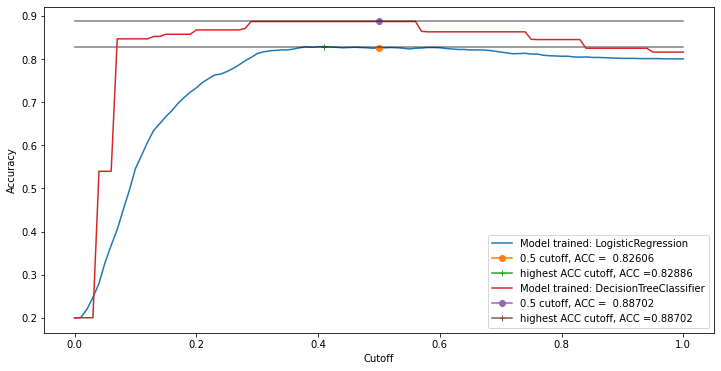

In [122]:
acc_values = []
max_acc = []

for model in models: 
    print("")

  # Fit model using the training set
    model.fit(X_train, y_train) 
  
  # Plot
    acc_values0,max_acc0 = cutoff_plot(X_test, y_test, model) 
    acc_values.append(acc_values0)
    max_acc.extend(max_acc0);

In [123]:
print(max_acc)

[0.41000000000000003, 0.8288590604026845, 0.5, 0.8870246085011185]


In [143]:
def cutoff_plot2(y_true, yhat_prob):

    # Create empty variables
    accs = []
    cutoffs = []
    _, _, thresholds = metrics.roc_curve(y_true, yhat_prob) 

    # Set range to loop through, 0,01 steps
    for i in thresholds: 
      
        temp = (yhat_prob >= i).astype(bool)      # create discrete predictions at cutoff
        cutoffs.append(i)                         # save cutoff value
        acc = np.sum(temp==y_true) / len(y_true)  # calculating accuracy sum(correct predictions)/ number of total predictions
        accs.append(acc)                          # save acc value

    acc_values = pd.Series(accs, index=cutoffs) # create Series saving the cutoffs as the index
    plt.plot(acc_values.index , acc_values)     # plot cutoffs and acc values as a line graph

    #plt.plot(0.5, acc_values[0.5], marker='o', label= '0.5 cutoff, ACC =  {:.5f}'.format(acc_values[0.5])) # plot acc_value for 0.5 cutoff, chose marker to mark point
    
    cutoff_best_acc = acc_values.sort_values(ascending=False).index[0] # get best cutoff by extacting index by sorting the acc values from high to low 
                                                                       # and chosing the first row (index=0)

    plt.plot(cutoff_best_acc, max(acc_values), marker='o', label='highest ACC cutoff, ACC ={:.5f}'.format(max(acc_values))) # Plot cutoff with best ACC value
    plt.plot([0, 1], [max(acc_values) , max(acc_values) ], color='k', alpha=.5) # extra: plot vertical line at cutoff to check if the value appears multiple times
    plt.legend() # plot legend
    plt.xlabel('Cutoff')
    plt.ylabel('Accuracy')

    
    print('The highest ACC score is: {:.5f}'.format(max(acc_values)))    
    print('The corresponding cutoff is: {:.2f}'.format(cutoff_best_acc))  

    return acc_values, [cutoff_best_acc, max(acc_values)] # return variables we want to save



The highest ACC score is: 0.83054
The corresponding cutoff is: 0.38


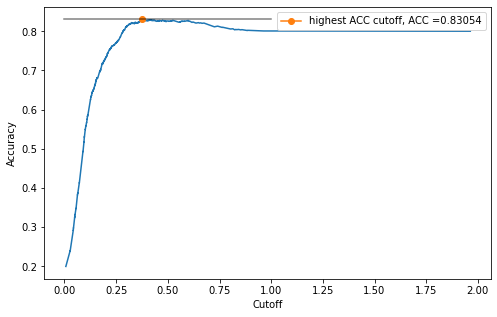

In [144]:
# Logit model
acc_values_logit, max_acc_logit = cutoff_plot2(y_test, logit_preb)

The highest ACC score is: 0.88702
The corresponding cutoff is: 0.57


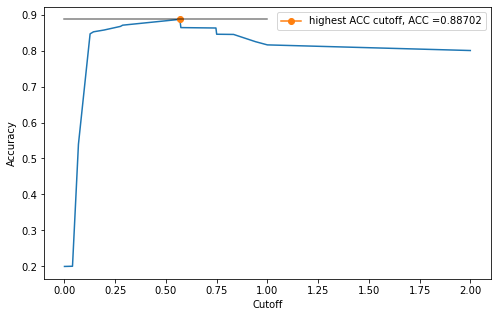

In [145]:
# Tree model
acc_values_tree, max_acc_tree = cutoff_plot2(y_test, tree_preb)

Examine these results. How does the cut-off influence the prediction? The `some_model.predict() `function uses a 0.5 cut-off. How did this cut-off perform in your calculations? What cut-off would you recommend based on your results?

- **Answer**: Both models show a high increase in accuracy in the cutoff range of about 0.0 to 0.3. After that, the accuracy remains relatively high. Interestingly, the optimal cutoff for the tree coincides with the default cutoff of 0.5. The default cutoff is also very suitable for the logit model, although it does not give the maximal accuracy. This finding is surprising because the data set is imbalanced containing roughly 5 goods for each bad risk. Normally, class imbalance is an indicator that some tuning of the cutoff is justified; not so in this data set. As to the "what would you recommend part of the question", the whole point of tuning the cutoff is to find the best setting with maximal accuracy; assuming the accuracy is the measure that you want to optimize. You can also optimize the cutoff for other indicators like the F-measure, which will be introduced in the scope of imbalanced learning. Further, for the tree, we see a plateau around the best cutoff with the same accuracy value, which the vertical line in the first graph reveals. The plateau and more generally the piece-wise constant shape of the tree plot is plausible when remembering that the predicted probabilities of a tree are constant in a leaf node. So a tree with e.g. 5 leaf nodes will predict five distinct probabilities value. The below plot shows how the predicted probabilities from our tree behave. The plot also hints at the fact that our above approach in cutoff_plot() was quite inefficient. We loop over the full range [0.00, 0.01, 0.02, ..., 1.00] while the number of unique probability estimates in yhat_prob_tree is much less. With this insight, **you could easily improve the cutoff_plot() such that it only test the cutoff values that will actually make a difference**. We leave this task to you as an additional exercise.
___

6. Use the results of your continuous predictions, extract the true and false positive rate using the function `metrics.roc_curve()` from `sklearn`, and plot a ROC curve. Re-using the cut-off that gave the largest accuracy in the previous task 5, identify the corresponding true and false positive rate. Then highlight this point on the ROC curve. Also highlight the point on the ROC curve that corresponds to a cut-off of 0.5. 



In [146]:
temp = (tree_preb < 0.05).astype(bool)
metrics.confusion_matrix(y_test, temp)

array([[804, 627],
       [338,  19]])

In [147]:
temp = (tree_preb >= 0.05).astype(bool)
metrics.confusion_matrix(y_test, temp)

array([[627, 804],
       [ 19, 338]])

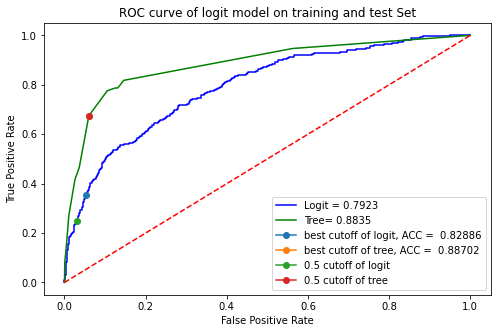

In [149]:
def tpr_fpr_calc(cutoff, yhat_prob, y_true):

    # temp variable giving distinct predictions based on the cutoff given as an input
    temp = (yhat_prob < cutoff).astype(bool)

    # Create confusion matrix for this prediction
    cmat = metrics.confusion_matrix(y_true, temp)
    
    # Calculate fpr
    fpr = cmat[1,0] / (cmat[1,1] + cmat[1,0]) # check if tpr and fpr are chosen correctly

    # Calculate TPR
    tpr = cmat[0,0]/(cmat[0,0]+cmat[0,1])

    return [tpr, fpr]


# Example how to 'manually' plot the ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, logit_preb)  # extracting FPR and TPR for the logit model
fpr_tr, tpr_tr, _ = metrics.roc_curve(y_test, tree_preb)  # same for the tree model
fpr_max, tpr_max = tpr_fpr_calc(max_acc[0], logit_preb, y_test)
fpr_max_tr, tpr_max_tr = tpr_fpr_calc(max_acc[2], tree_preb, y_test)

#fpr_max_ROC, tpr_max_ROC = tpr_fpr_calc(max_acc_logit[0], logit_preb, y_test)
#fpr_max_tr_ROC, tpr_max_tr_ROC = tpr_fpr_calc(max_acc_tree[0], tree_preb, y_test)
# Re-using the cut-off that gave the largest accuracy in the previous task 5,
# identify the corresponding true and false positive rate


# Compute AUC
auc = metrics.auc(fpr, tpr) 
auc_tr = metrics.auc(fpr_tr, tpr_tr)

# ROC curve:
plt.plot(fpr, tpr, "b", label="Logit = %0.4f" % auc)
plt.plot(fpr_tr, tpr_tr, "b", label="Tree= %0.4f" % auc_tr, color='green')
plt.plot(fpr_max, tpr_max, marker='o', label= 'best cutoff of logit, ACC =  {:.5f}'.format(max_acc[1])) 
plt.plot(fpr_max_tr, tpr_max_tr, marker='o', label= 'best cutoff of tree, ACC =  {:.5f}'.format(max_acc[3])) 

#plt.plot(fpr_max_ROC, tpr_max_ROC, marker='x', markersize=12, label= 'best cutoff of logit based on ROC, ACC =  {:.5f}'.format(max_acc_logit[1])) 
#plt.plot(fpr_max_tr_ROC, tpr_max_tr_ROC, marker='x', markersize=12, label= 'best cutoff of tree based on ROC, ACC =  {:.5f}'.format(max_acc_tree[1])) 

plt.plot(tpr_fpr_calc(0.5, logit_preb, y_test)[0], tpr_fpr_calc(0.5, logit_preb, y_test)[1], marker='o',
         label= '0.5 cutoff of logit')
plt.plot(tpr_fpr_calc(0.5, tree_preb, y_test)[0], tpr_fpr_calc(0.5, tree_preb, y_test)[1], marker='o',
         label= '0.5 cutoff of tree')




# Random benchmark
plt.plot([0, 1], [0, 1], "r--");  

# Plot configuration
plt.title('ROC curve of logit model on training and test Set')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")
plt.show()

7. Manually define a cut-off in which the ratio of predictions of 0s (goods) and 1s (bads) is representative of the ratio of them in the training data. For example, if your good-to-bad ratio in the training set was 3:1, then your discrete class predictions for the test set should also display this ratio.

In [184]:
ratio_train = sum(y_train)/len(y_train)
ratio_train

0.19942473633748803

In [197]:
#without labels, to get the cut-off
tree_cutoff_class= pd.qcut(tree_preb, q= [0,1-ratio_train,1])
print(tree_cutoff_class.describe())

#with labels
tree_cutoff_class= pd.qcut(tree_preb, q= [0,1-ratio_train,1],labels = [0,1])
print(tree_cutoff_class.describe())
print(np.mean(tree_cutoff_class)) # check average

#for tree models, such cutoff is 0.287

                 counts     freqs
categories                       
(-0.001, 0.287]    1461  0.817114
(0.287, 1.0]        327  0.182886
            counts     freqs
categories                  
0             1461  0.817114
1              327  0.182886
0.18288590604026847


In [201]:
#without labels, to get the cut-off
logit_cutoff_class= pd.qcut(logit_preb, q= [0,1-ratio_train,1])
print(logit_cutoff_class.describe())

#with labels
logit_cutoff_class= pd.qcut(logit_preb, q= [0,1-ratio_train,1],labels = [0,1])
print(logit_cutoff_class.describe())
print(np.mean(logit_cutoff_class)) # check average

#for tree models, such cutoff is 0.299

                  counts     freqs
categories                        
(0.00557, 0.299]    1431  0.800336
(0.299, 0.963]       357  0.199664
            counts     freqs
categories                  
0             1431  0.800336
1              357  0.199664
0.19966442953020133


In [188]:
#understand the np.qcut

#test = np.linspace(0,1,5)
#print(test)
#pd.qcut(test, 3)
#pd.qcut(test, [0,0.25,1])



[(-0.001, 0.25], (-0.001, 0.25], (0.25, 1.0], (0.25, 1.0], (0.25, 1.0]]
Categories (2, interval[float64]): [(-0.001, 0.25] < (0.25, 1.0]]

8. Assess your classifier by creating a precision-recall plot.

In [207]:
def prec_recall_plot(yhat_prob,y_true, label):

    # Create empty variables
    prec = []
    cutoffs = []
    recall = []
    

    # Set range to loop through, 0,01 steps
    for i in np.arange(0,1.01,0.01):
      
        temp = (yhat_prob >= i).astype(bool)      # create discrete predictions at cutoff
        cutoffs.append(i)                         # save cutoff value
        cmat = metrics.confusion_matrix(y_true, temp)
        
        # Precision
        prec0 = cmat[1][1] / (cmat[1][1]+cmat[0][1])
        prec.append(prec0)

        # Recall
        recall0 = cmat[1][1] / (cmat[1][1]+cmat[1][0])
        recall.append(recall0)

    #acc_values = pd.Series(accs, index=cutoffs) # create Series saving the cutoffs as the index
    plt.plot(recall , prec,label=label)     # plot cutoffs and acc values as a line graph

    #plt.plot(0.5, acc_values[0.5], marker='o', label= '0.5 cutoff, ACC =  {:.5f}'.format(acc_values[0.5])) # plot acc_value for 0.5 cutoff, chose marker to mark point
    
    #cutoff_best_acc = acc_values.sort_values(ascending=False).index[0] # get best cutoff by extacting index by sorting the acc values from high to low 
                                                                       # and chosing the first row (index=0)

    #plt.plot(cutoff_best_acc, max(acc_values), marker='o', label='highest ACC cutoff, ACC ={:.5f}'.format(max(acc_values))) # Plot cutoff with best ACC value
    #plt.plot([0, 1], [max(acc_values) , max(acc_values) ], color='k', alpha=.5) # extra: plot vertical line at cutoff to check if the value appears multiple times
    plt.legend() # plot legend
    plt.xlabel('Recall')
    plt.ylabel('Precition')

    
    #print('The highest ACC score is: {:.5f}'.format(max(acc_values)))    
    #print('The corresponding cutoff is: {:.2f}'.format(cutoff_best_acc))  

    return prec, recall, cutoffs # return variables we want to save



<ipython-input-207-5be51b6c611f>:17: RuntimeWarning: invalid value encountered in long_scalars
  prec0 = cmat[1][1] / (cmat[1][1]+cmat[0][1])


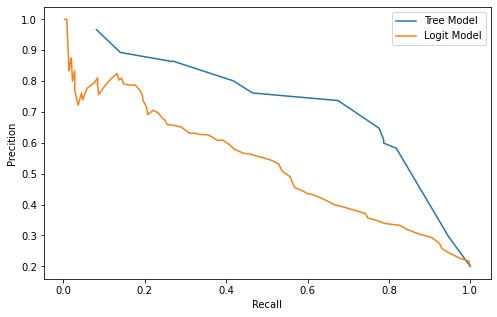

In [209]:
tree_pre, tree_recall, tree_cutoffs = prec_recall_plot(tree_preb, y_test, 'Tree Model')
logit_pre, logit_recall, logit_cutoffs = prec_recall_plot(logit_preb, y_test, 'Logit Model')

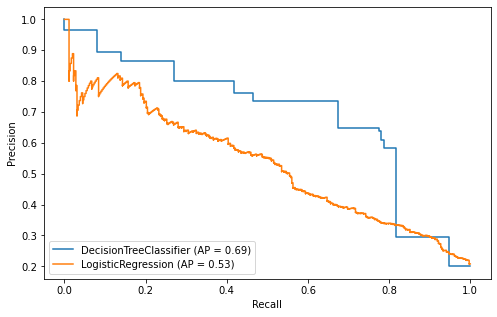

In [210]:
# As usual, functions already exist
# Use this function to directly create a precision-recall curve
from sklearn.metrics import plot_precision_recall_curve

fig, ax = plt.subplots()

plot_precision_recall_curve(tree, X_test, y_test, ax=ax)
plot_precision_recall_curve(logit, X_test, y_test, ax=ax)

How does this table differ from the ROC curve? Which of them would you use in different situations?

- **Answer**: Precision-recall curves are another metric to assess a model and is particularly helpful when analyzing models built on an **imbalanced dataset**. They summarize the trade-off between precision and recall over all cutoffs, meaning the positive predicted value and the true positive rate, respectively. For this model specifically, I would use this representation, as we can have a closer look at the predicted 'bad's, which are a lot less frequent in this data set than the 'good's. **This graph is only helpful when the specificity is not/less important**. As it is more important for us to find out how to distinguish the class 'bad', as they are harder to identify and can cost a credit giver a lot more money, this is true for our scenario. As we can see, the tree model still seems to outperform the logit model based on the precision-recall plot.
___

Next we want to find out how the size of the training set can affect our predictions.

9. Create a loop in which you train multiple logit models. Vary a parameter `train_set_size` from 0 to 1 in steps of 0.1. In each iteration of the loop, estimate a logit model using `train_set_size` percent of the actual training set, which we created at the beginning of the exercise. Calculate the AUC for our test set for each model and save it in an array. Finally, create a plot of `train_set_size` on the x-axis versus the corresponding test set AUC on the y-axis. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=888)

logit = LogisticRegression(penalty='none', fit_intercept=True)
logit.fit(X_train, y_train)

tree = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree.fit(X_train, y_train)


metrics.roc_auc_score(y_test, temp)

Looking at this plot, do you think logit is sensitive toward the size of the training set?

**Optional:** you could also repeat the above task and create a plot for a decision tree model. This would facilitate comparing the 'hunger' for data between logit and trees.
___


10. Familiarize yourself with the `StratifiedKFold()` function of `sklean`. We want to use this function to create 5 splits. Use the  ` cross_validate()` function to calculate the corresponding average AUC. Compare the results to the ones in task 4.



Which model performed better? How do you explain these results? Read up on this function. How does it work and why would you use it?
___
___

Well done!! You have reached the end of this exercise.